# UNIFACISA Data Science Specialization 

**Módulo:** Visulaizaçao de Dados II

**Aluno:** Mayke Kend Gomes Delgado

**Matrícula:** 1691690020

**Professor:** Dr.Luiz

# Introduction

 Este é o repositório de dados do Novo Painel Visual para Coronavírus 2019, operado pelo Centro de Ciência e Engenharia da Universidade Johns Hopkins (JHU CSSE). Além disso, com o apoio da ESRI Living Atlas Team e do Laboratório de Física Aplicada da Johns Hopkins University (JHU APL). *Disponível* [aqui](https://github.com/CSSEGISandData/COVID-19).

![COVID-19](https://static.poder360.com.br/2020/03/23312-868x644.png)

**Antes de tudo, é necessário importar o Altair e o Pandas.**

In [0]:
# Importação das bibliotecas necessárias
import pandas as pd # para criação do dataFrames e chamada de comandos
import seaborn as sb # para plotar Heatmaps
import numpy as np

from vega_datasets import data

import altair as alt # Visualização de dados de modo interativo

**Importando os dados de confirmados, mortes e recuperados**

In [0]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [0]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [0]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

Precisamos ler cada um através do head()

In [0]:
confirmed_cases.head() # lendo os dados para casos confirmados

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7


In [0]:
deaths_reported.head() # lendo os dados para casos de mortes pelo vírus

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
recovered_cases.head() # lendo os dados para casos de recuperação

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Note que os dados estão de acordo com a data de cada caso se houve ou não um dereminado caso de confirmação do vírus, mortes e/ou até mesmo de pessoas recuperados, como também a quantidade por dia.

Nesse caso, **primeiramente iremos efetuar uma análise sobre os dados de pessoas confirmadas pelo vírus COVID-19**

In [0]:
#Pode-se perceber que nosso dataset está com dados de recuperados são inferior aos demais em termos de quantidade de linhas.

print("O Shape de confirmados: ", confirmed_cases.shape)
print("O Shape de mortos     : ", deaths_reported.shape)
print("O Shape recuperados   : ", recovered_cases.shape)

O Shape de confirmados:  (253, 72)
O Shape de mortos     :  (253, 72)
O Shape recuperados   :  (239, 72)


# Confirmed Cases

Vamos efetuar uma análise sobre os casos que foram confirmados em nossa base de dados, visto que precisamos efetuar um filtro dos casos a cada dia.

In [0]:
# Apenas por curiosidade, estou veriicando os dados sobre os países que foram afetados pelo vírus
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [0]:
confirmed_cases.tail() # detalha de acordo com os ultimos 5 casos de nossa base de dados

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,10
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [0]:
confirmed_cases.shape # mostra a quantidade de linhas e colunas de nosso dataset novamente, só para se ter uma noção do que realmente iremos usar

(253, 72)

**Cases Confirmed by the World**

In [0]:
# Seleciona todas as linhas com o simbolo ":" e o "1" se refere ao casos.shape que pega a posição (x,y) do shape(y)
confirmed_cases.iloc[:,4 : confirmed_cases.shape[1]] 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,10
249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4


Vamos preparar com ajuda de nossa filtragem usando nossa função do (iloc), passando a linha desejada para efetuarmos um somatório dos ultimos casos diários por data.

In [0]:
confirmed_cases = np.sum(confirmed_cases.iloc[:,4 : confirmed_cases.shape[1]]) # gerando o somatório apenas das datas pelo shape das colunas
confirmed_cases.index = pd.DatetimeIndex(confirmed_cases.index) # indexando a função DatetimeIndex
confirmed_cases.tail() # Lendo os casos identificados a cada dia.

2020-03-25    467653
2020-03-26    529591
2020-03-27    593291
2020-03-28    660706
2020-03-29    720117
dtype: int64

Plotando em um gráfico de linhas em que mostra casos de acordo com os dias do mês em um período de 30 dias

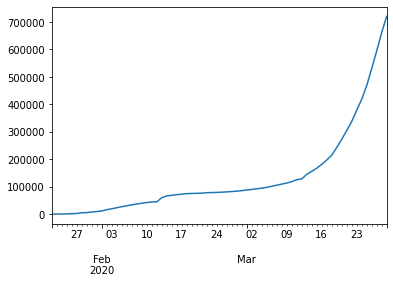

In [0]:
confirmed_cases.plot() # Casos confirmados

# Deaths Reported

Agora, iremos analisar as mortes que foram reportadas ao nosso dataset:

In [0]:
deaths_reported.tail() # detalhando os ultimos casos

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
deaths_reported.shape # realizando nossa análise em cima das linhas x colunas, note que é igual ao número dos casos confirmados

(253, 72)

Seguiremos o nosso padrão na exploração dos dados com a função iloc apenas para as datas de acordo com as colunas de até o dia 28/03/2020

In [0]:
deaths_reported = np.sum(deaths_reported.iloc[:,4 : deaths_reported.shape[1]])
deaths_reported.index = pd.DatetimeIndex(deaths_reported.index)
deaths_reported.tail() # mortes identificados a cada dia.

2020-03-25    21181
2020-03-26    23970
2020-03-27    27198
2020-03-28    30652
2020-03-29    33925
dtype: int64

Os casos de mortes pelo vírus tende-se a crescer a partir do período entre dia 09 à dia 16 por diante, visto que já havia infectado boa parte da Europa segundo o noticiário.

*Disponível* [aqui](https://veja.abril.com.br/mundo/espanha-supera-china-em-numero-de-mortos-por-coronavirus/).

 

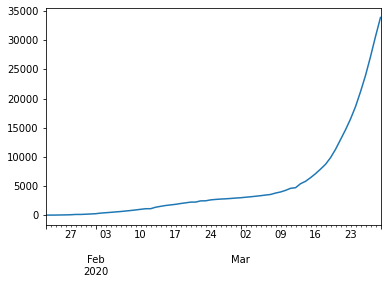

In [0]:
deaths_reported.plot()

# Mortality

Embora o percentual seja muito menor que o de outras doenças infecciosas graves, como o Ebola, o índice é considerável se comparado a um vírus como o da gripe. Assim, tivemos a curiosidade de efetuar essa análise sobre a mortalidade a cerca do COVID-19

**Para sabermos a taxa, mortalidade = (mortes/confirmados)*100%**

In [0]:
mortality = (deaths_reported/confirmed_cases)*100 

Geramos um gráico para enternder melhor esse caso, note que cresceu bastante ao longo dos dias:

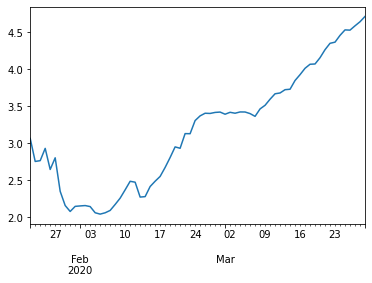

In [0]:
mortality.plot() 

# Recovered Cases

Além de efetuarmos uma análise em visualizações de dados sobre confirmados,mortes, taxa de mortalidade, não poderiamos deixar de lado os recuperados, pessoas que tiveram e estão fora da zona de risco.

In [0]:
recovered_cases.shape # Note que a quantidade de linhas é inferior aos demais datasets

(239, 72)

In [0]:
#Seguimos com nosso padrão de analise com o  iloc sobre as datas

recovered_cases = np.sum(recovered_cases.iloc[:,4 : recovered_cases.shape[1]])
recovered_cases.index = pd.DatetimeIndex(recovered_cases.index)
recovered_cases.tail() # recuperadas identificados a cada dia.

2020-03-25    113787
2020-03-26    122150
2020-03-27    130915
2020-03-28    139415
2020-03-29    149082
dtype: int64

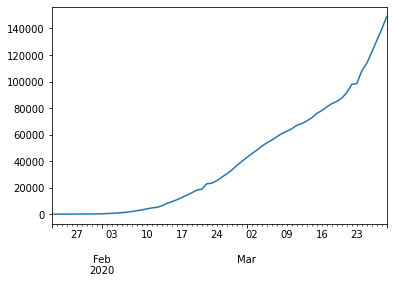

In [0]:
recovered_cases.plot() # Visualização dos recuperados, pode-se perceber que há uma melhoria em conformidade com as pessoas ativas/confirmadas

# Active

Em um mundo globalizado, não podemos deixar de lados pessoas que estão em atividade com o vírus e requem fixar-se em quarentena. No entanto, pode ocorrer risco aos não infectados e esse número cresce a cada dia. Assim, descidimos analisar. 

ativos = confirmados - (pessoas recuperadas + mortes)

In [0]:
active = confirmed_cases - (recovered_cases + deaths_reported) # pessoas que ainda possuiem o vírus

In [0]:
active.tail() # Ultimos casos

2020-03-25    332685
2020-03-26    383471
2020-03-27    435178
2020-03-28    490639
2020-03-29    537110
dtype: int64

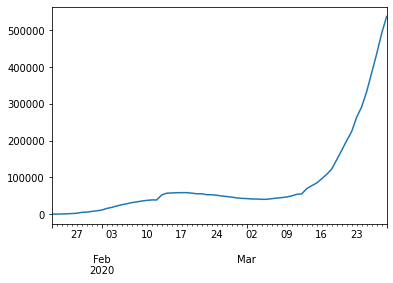

In [0]:
active.plot() # Gerando uma análise visual, note que cresce sem controle

Chegamos em um ponto que fiquei bastante curioso a cerca desses datasets, no que se refere a junção dentre eles, ou seja, a relção em que cada um possui sobre o outro. Assim precisei usar uma função chamada **concat** para formar nosso dataframe de (confirmed_cases, active, recovered_cases, deaths_reported).

In [0]:
# concatenar o dataframe, ou seja, juntar as informações
df = pd.concat([confirmed_cases, active, recovered_cases, deaths_reported], axis=1)

In [0]:
df.tail() # ultimos dados do dataFrame

,0,1,2,3
2020-03-25,467653,332685,113787,21181
2020-03-26,529591,383471,122150,23970
2020-03-27,593291,435178,130915,27198
2020-03-28,660706,490639,139415,30652
2020-03-29,720117,537110,149082,33925


Apenas usei o comando columns para renomear e acilitar nossa visulaização mais a baixo.

In [0]:
df.columns = (['casos', 'ativos', 'recuperadas', 'mortes'])

In [0]:
df.tail() # ultimos dados para cada situação

,casos,ativos,recuperadas,mortes
2020-03-25,467653,332685,113787,21181
2020-03-26,529591,383471,122150,23970
2020-03-27,593291,435178,130915,27198
2020-03-28,660706,490639,139415,30652
2020-03-29,720117,537110,149082,33925


Assim, gerando nosso gráico em linhas para 4 casos.

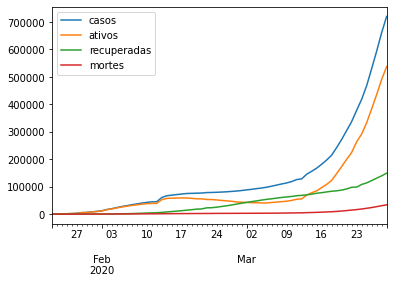

In [0]:
df.plot() 

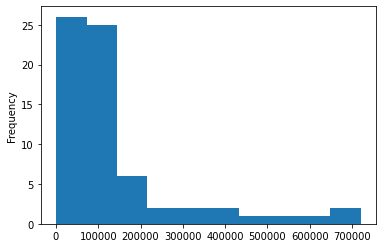

In [0]:
df["casos"].plot.hist() # Plotando gráfico para casos confirmados

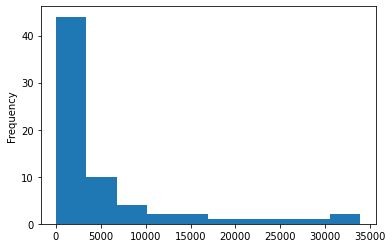

In [0]:
df["mortes"].plot.hist() # Plotando gráfico para casos de mortes

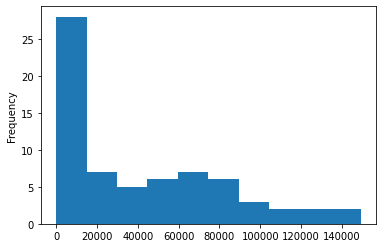

In [0]:
df["recuperadas"].plot.hist() # Plotando gráfico para casos recuperados 

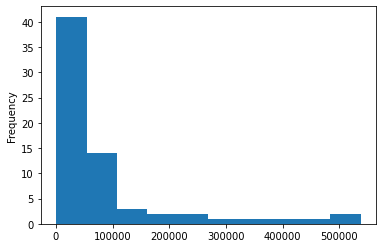

In [0]:
df["ativos"].plot.hist() # Plotando gráfico para casos para ativos

Por curiosidade, gostaria de realizar uma verificação na quantidade sobre cada caso.

In [0]:
df['casos'].sum() # Quantidade de casos confirmados

8964523

In [0]:
df['ativos'].sum() # Quantidade de pessoas atica com o vírus

5865088

In [0]:
df['recuperadas'].sum() # Pessoas recuperadas

2745127

In [0]:
df['mortes'].sum() # Mortes

354308

In [0]:
df.info() # informações precisas de nosso dataFrame (df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2020-01-22 to 2020-03-29
Data columns (total 4 columns):
casos          68 non-null int64
ativos         68 non-null int64
recuperadas    68 non-null int64
mortes         68 non-null int64
dtypes: int64(4)
memory usage: 2.7 KB


In [0]:
df.describe()
# breve descrição entre contagem de registros
# média
# desvio padrão
# minimo
# quatis em 25%, 50% e 75% da base
# por fim, máximo.

,casos,ativos,recuperadas,mortes
count,68.000000,68.000000,68.000000,68.000000
mean,131831.220588,86251.294118,40369.514706,5210.411765
std,160308.912019,116249.445501,41236.269378,7524.815137
min,555.000000,510.000000,28.000000,17.000000
25%,36437.750000,33188.750000,2464.750000,784.250000
50%,79983.500000,47671.000000,26566.000000,2668.500000
75%,132565.250000,61492.750000,68805.750000,4891.000000
max,720117.000000,537110.000000,149082.000000,33925.000000


In [0]:
df.dtypes # tipos de dados que estamos analisando

casos          int64
ativos         int64
recuperadas    int64
mortes         int64
dtype: object

In [0]:
df.shape # quantidade no geral após concatenar os datasets

(68, 4)

In [0]:
# Verificando se possui valores faltantes para cada coluna 
for i in df.columns:
    print (i + ": "+str(sum(df[i].isnull()))+" Valores faltantes")

casos: 0 Valores faltantes
ativos: 0 Valores faltantes
recuperadas: 0 Valores faltantes
mortes: 0 Valores faltantes


Após toda essa análise, iremos observar mais a fundo cada dado com a biblioteca **Altair**. Essa biblioteca podemos manipular de modo interativo com o intuito de visualizar os dados em geral com select, usando scroll mouse, hover e entre outros comandos básicos.

In [0]:
# Apenas usando o Altair para referirmos os dados sobre os casos mediante a mortes pelo vírus

In [0]:
dado = pd.DataFrame(df)

alt.Chart(dado).mark_line(
    color='purple',
    opacity=0.41,

).encode(
    x='casos',
    y='recuperadas',
)

alt.Chart(...)

In [0]:
alt.Chart(dado).mark_bar().encode(
    x='casos',
    y='mortes',
)

# Notei que não ficou legal essa visualização, vamos procurar mais!

alt.Chart(...)

Note que os dados tanto em linhas quanto em barras para casos de confirmados, mortes e recuperados há uma proporção exponencial com o grau que cada um vai aumentando as demais situações também os acompanham, ou seja, esse vírus de fato é muito perigoso.

# COVID - 19 GLOBAL 03-21-2020

Em busca de novos conhecimentos e curiosidades em manusear a biblioteca *Altair*, descidi ultilizar o dataset de base completo.

In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-21-2020.csv'

covid = pd.read_csv(url, error_bad_lines=False) 

In [0]:
covid.head() # lendo os dados para se ter uma noção das colunas

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880


In [0]:
covid.columns # Descriçao sobre cadas Index do dataset

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')

In [0]:
covid.shape # linhas e colunas

(304, 8)

Nesse dataset, terei como objetivo principal em descrecer de modo detalhado cada tipo de visualiação que se encaixe nessa base de dados. Assim, mostrando uma visualização **Global para Maps/Zonas COVID-19**.

Primeiro, preciso criar uma variável de acordo com os casos confirmados em cada país, no qual preciso usar o groupby para efetuar uma soma dos casos de cada lugar.

In [0]:
confirmed_country = covid[['Country/Region', 'Confirmed']].groupby(['Country/Region']).sum() # casos confirmados por países

Em segundo plano, crio uma variável  passando a região junto a latitude e longitude com a função groupby efetuando uma médica em relação aos países para poder efetuar uma merge em um mapa posteriomente.

In [0]:
geographic_country = covid[['Country/Region', 'Latitude', 'Longitude']].groupby(['Country/Region']).mean() # média dentre a lat/log com relação aos países

Faremos a junção dessas duas variáveis sobre cada país, apenas para nos retornar a quantidade de confirmados de cada país e localidade com Latitude	e Longitude.

In [0]:
confirmed_cases1 = pd.merge(confirmed_country, geographic_country, on='Country/Region')

In [0]:
confirmed_cases1.head() # lendo os dados 

,Confirmed,Latitude,Longitude
Country/Region,,,
Afghanistan,24,33.9391,67.7100
Albania,76,41.1533,20.1683
Algeria,139,28.0339,1.6596
Andorra,88,42.5063,1.5218
Angola,2,-11.2027,17.8739


In [0]:
selecao = alt.selection_single(fields=["Major_Genre"], bind="legend")

alt.Chart(covid).mark_point().encode(
    x = "Confirmed:Q",
    y =  "Deaths:Q",
    tooltip = ["Country/Region:N", "Last Update:N"],
    color = "Major_Genre:N",
    opacity = alt.condition(selecao, alt.value(1), alt.value(0))
    
).add_selection(
    selecao
)

alt.Chart(...)

Antes de mais nada, temos que efetuar uma conversão a cerca da variável Last Update, visto são chaves podem ser abreviações comuns como ['ano', 'mês', 'dia', 'minuto', 'segundo', 'ms', 'nós', 'ns']).

In [0]:
covid['Last Update'] = pd.to_datetime(covid['Last Update']) # passando para função to_datetime

covid['Data'] = covid['Last Update'].dt.strftime('%Y-%m-%d') # ['ano', 'mês', 'dia']
covid.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Data
0,Hubei,China,2020-03-21 10:13:08,67800,3139,58946,30.9756,112.2707,2020-03-21
1,NaN,Italy,2020-03-21 17:43:03,53578,4825,6072,41.8719,12.5674,2020-03-21
2,NaN,Spain,2020-03-21 13:13:30,25374,1375,2125,40.4637,-3.7492,2020-03-21
3,NaN,Germany,2020-03-21 20:43:02,22213,84,233,51.1657,10.4515,2020-03-21
4,NaN,Iran,2020-03-21 11:13:12,20610,1556,7635,32.4279,53.6880,2020-03-21


retornando os dados do covid em que não possui mais 2020-03-21T10:13:08 e sim 2020-03-21 10:13:08	para variável Last Update.

In [0]:
case_day =  covid[['Data', 'Confirmed']].groupby(['Data']).sum() # usando o groupby para verificar a quantidade de casos confirmados a cada dia que passa.
case_day

,Confirmed
Data,
2020-03-11,1085
2020-03-12,935
2020-03-13,453
2020-03-14,2292
2020-03-15,1224
2020-03-16,515
2020-03-17,9
2020-03-18,153
2020-03-19,267


**Países que tem mais de 50 casos de mortes**

In [0]:
map = alt.topo_feature("https://cdn.jsdelivr.net/npm/world-atlas@2/countries-110m.json", "countries") # usaremos essa função para geramos um Map posteriormente.

In [0]:
selecao = alt.selection_multi(fields=["Country/Region"])

alt.Chart(covid).mark_point(size=300).encode(
    
    x = alt.X("Confirmed:Q", title="Confirmados"),
    y =  alt.X("Deaths:Q", title="Mortes"),

    tooltip = ["Country/Region:N", "Confirmed","Deaths","Recovered", "Data:T"],
    color = "Country/Region:N",
    opacity = alt.condition(selecao, alt.value(1), alt.value(0))
    
).add_selection(
    selecao
).interactive()

alt.Chart(...)

In [0]:

selecao = alt.selection_multi(fields=['Country/Region'])

alt.Chart(covid).mark_point().encode(
    x = alt.X("Confirmed:Q", title="Confirmados"),
    y =  alt.X("Deaths:Q", title="Mortes"),
    color = "Country/Region:N",
    tooltip = ["Country/Region:N", "Confirmed","Deaths","Recovered", "Data:T"],
).add_selection(selecao).transform_filter(selecao).interactive()

alt.Chart(...)

**Apresentando a quantidade de mortes em cada países que foram mais afetados.**

**Países que tem mais de 50 casos de mortes**

In [0]:
alt.Chart(covid[covid['Deaths'] > 50]).mark_bar(
    
    size = 15,
    opacity= 0.9,

).encode(
   
    x = alt.X('Country/Region', title="Países"),
    y = alt.X('Deaths', title="Mortes"), 

    color = alt.X('Country/Region', title = "Países")
)

alt.Chart(...)

**Países que tem mais de 100 casos de mortes**

In [0]:
alt.Chart(covid[covid['Deaths'] > 100]).mark_bar(
    
    size = 15,
    opacity= 0.9,

).encode(
   
    x = alt.X('Deaths', title="Mortes"),
    y = alt.X('Country/Region', title="Países"), 

    color = alt.X('Country/Region', title = "Países")
)

alt.Chart(...)

**Países que tem mais de 500 casos de mortes**

In [0]:
alt.Chart(covid[covid['Deaths'] > 500]).mark_bar(
    
    size = 15,
    opacity= 0.9,

).encode(
   
    x = alt.X('Deaths', title="Mortes"),
    y = alt.X('Country/Region', title="Países"), 

    color = alt.X('Country/Region', title = "Países")
)

alt.Chart(...)

In [0]:


cores = alt.Chart(map).mark_geoshape(
    fill='black',
    stroke='green'
).properties(
    width=1000,
    height=700
).project('naturalEarth1')

pontos = alt.Chart(covid).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size='Confirmed:Q',
    color=alt.value('red'),
    )

cores + pontos


alt.LayerChart(...)

In [0]:
# DEvo testar outros maps e lançar ao meu prótifólio do github - efetuar vídeo tutorial no youtube para ajudar futuros cientias de dados. Professor de parabéns, esse foi o melhor visualização já vista no curso até agora.